<h1> KNN on Lease data</h1> 

<h3> KNN without library</h3> 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import math
import random
import operator
%matplotlib inline

In [8]:
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/Owl/owl_lease_ML.csv")

In [51]:
##################################################################################################
# Load data
##################################################################################################
import csv
import random

Filename = path1
split = 0.5

#################################################################################################
#Sample design
num_lines = sum(1 for l in open(path1))   # Count number of lines
sample_size = 10                          # Sample size
size = int(num_lines / sample_size)       # Sample size % of total 

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - size)


def loadDataset(filename, split, training_set=[] , test_set=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        skiprows = skip_idx
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                training_set.append(dataset[x])
            else:
                test_set.append(dataset[x])

In [52]:
training_set

[[0.0, 100.0, 4842.0, 2.0, '1', '1988', '38'],
 [3.0, 66.67, 4793.0, 16.0, '2', '1988', '38'],
 [1.0, 66.67, 4583.0, 4.0, '3', '1988', '38'],
 [1.0, 33.33, 4583.0, 4.0, '3', '1988', '38'],
 [1.0, 100.0, 4340.0, 0.0, '6', '2015', '12'],
 [1.0, 100.0, 4340.0, 0.0, '7', '2015', '12'],
 [1.0, 100.0, 3953.0, 0.0, '8', '2016', '12'],
 [1.0, 100.0, 4228.0, 0.0, '12', '2015', '12'],
 [1.0, 100.0, 4386.0, 0.0, '13', '2015', '12'],
 [1.0, 100.0, 4025.0, 0.0, '14', '2015', '12'],
 [1.0, 100.0, 3743.0, 0.0, '15', '2015', '12'],
 [1.0, 100.0, 3697.0, 0.0, '16', '2015', '12'],
 [1.0, 100.0, 3809.0, 0.0, '17', '2016', '12']]

In [10]:
##################################################################################################
# Distance function
##################################################################################################
import math

def euclideanDistance(instance1, instance2, length): # length = # columns & last one is observations
    distance = 0
    lentgh = len(instance1)-1
    for x in range(length):
        distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)

In [11]:
##################################################################################################
# Neighhbor function
##################################################################################################
import operator

def getNeighbors(training_set, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(training_set)):
        dist = euclideanDistance(testInstance, training_set[x], length)
        distances.append((training_set[x], dist))
    distances.sort(key=operator.itemgetter(1)) 
    neighbors = []                        
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [12]:
##################################################################################################
# Get response
##################################################################################################
classVotes = {}
def getResponse(neighbors):
   # classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [13]:
##################################################################################################
# Get accuracy measure
##################################################################################################

def getAccuracy(test_set, predictions):
    correct = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == predictions[x]:
            correct += 1
    return (correct/len(test_set)) * 100.0

In [44]:
num_lines

20

In [45]:
import random
import csv

with open(path1) as csvfile:
    lines = csv.reader(csvfile)
    skiprows = skip_idx
    dataset = list(lines)

In [48]:
training_set=[]
test_set=[]
split = 0.5 # % of training set
filename = path1
loadDataset(filename, split, training_set , test_set)

In [49]:
training_set

[[0.0, 100.0, 4842.0, 2.0, '1', '1988', '38'],
 [3.0, 66.67, 4793.0, 16.0, '2', '1988', '38'],
 [1.0, 66.67, 4583.0, 4.0, '3', '1988', '38'],
 [1.0, 33.33, 4583.0, 4.0, '3', '1988', '38'],
 [1.0, 100.0, 4340.0, 0.0, '6', '2015', '12'],
 [1.0, 100.0, 4340.0, 0.0, '7', '2015', '12'],
 [1.0, 100.0, 3953.0, 0.0, '8', '2016', '12'],
 [1.0, 100.0, 4228.0, 0.0, '12', '2015', '12'],
 [1.0, 100.0, 4386.0, 0.0, '13', '2015', '12'],
 [1.0, 100.0, 4025.0, 0.0, '14', '2015', '12'],
 [1.0, 100.0, 3743.0, 0.0, '15', '2015', '12'],
 [1.0, 100.0, 3697.0, 0.0, '16', '2015', '12'],
 [1.0, 100.0, 3809.0, 0.0, '17', '2016', '12']]

In [50]:
filename

'C:/Users/aath/Dropbox/MAEN/Thankful/Data/Owl/owl_lease_ML.csv'

In [ ]:
= neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))

In [22]:
training_set

[[66.67, '38', 1.0, 4583.0, '1988', '3', 4.0],
 ['2015', 1.0, 4340.0, '6', 100.0, '12', 0.0],
 [2.0, '38', 4842.0, '1988', '1', 0.0, 100.0],
 [4793.0, 3.0, '1988', '38', '2', 16.0, 66.67],
 [100.0, 0.0, '2016', '8', 1.0, '12', 3953.0],
 [33.33, '3', 4583.0, '38', '1988', 4.0, 1.0],
 [100.0, 1.0, 3746.0, '4', '2013', 0.0, '12'],
 ['2015', '12', 0.0, 1.0, 4438.0, 100.0, '11'],
 ['100', 100.0, 1.0, 0.0, '2014', 4481.0, '9'],
 ['7', '12', '2015', 4340.0, 1.0, 100.0, 0.0]]

In [ ]:
##################################################################################################
# Prediction
##################################################################################################
predictions=[]  
k = 2
    
for x in range(len(test_set)):
    neighbors = getNeighbors(training_set, test_set[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(test_set[x][-1]))

accuracy = getAccuracy(test_set, predictions)
print('Accuracy: ' + repr(accuracy) + '%')


 <h2> KNN wit sklearn library </h2>

In [243]:
from sklearn.neighbors import KNeighborsRegressor 
df1 = pd.read_excel(path1)
y1 = df1.iloc[:,-1].copy()
X = df1.loc[:, df1.columns != 'jazz'].copy()
knnr = KNeighborsRegressor(n_neighbors=k)
knnr.fit(X, y1)
print ("The MSE is:{}".format(np.power(y1 - knnr.predict(X),k).mean()))

The MSE is:0.075


 <h2> Same dataset using multivariable regression </h2>

In [219]:
df2 = pd.read_excel(path1)

In [220]:
# Randomly split the data into the training and test parts
training_set2=df2.sample(frac=split, random_state=200)
test_set2 = df2.drop(training_set2.index)

In [221]:

x_test = test_set.loc[:, test_set.columns != 'jazz'].copy()
x_train = training_set.loc[:, training_set.columns != 'jazz'].copy()

y_test = test_set.iloc[:,-1].copy()
y_train = training_set.iloc[:,-1].copy()


In [211]:
import statsmodels.api as sm
sm_OLS_test = sm.OLS(y_train, x_train) 
full_res = sm_OLS_test.fit() 
print ("\n \n",full_res.summary()) 

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



 
                             OLS Regression Results                            
Dep. Variable:                   jazz   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     61.24
Date:                Mon, 07 May 2018   Prob (F-statistic):           2.61e-06
Time:                        14:50:55   Log-Likelihood:                 3.7901
No. Observations:                  12   AIC:                            -1.580
Df Residuals:                       9   BIC:                           -0.1254
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
duration    8.542e-05      0.001      0.127     

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [213]:
predictions2 = full_res.predict(x_test)

In [214]:
residual = y_test - predictions2

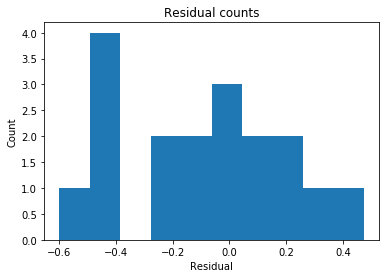

In [215]:
# Outliers or skewness in error 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()